# What Patterns Exist Between Energy Consumption and Generation?

**Business Context.** Energy supply and demand is a hotly debated topic across world governments and political parties. You are an analyst for a new nuclear power plant firm, and are responsible for discerning patterns in electric power generation and consumption across different energy sources as well as across sectors of the U.S. economy in order to help drive business strategy.

**Business Problem.** Your boss would like you answer the following question: **"Given patterns in energy consumption across sectors and time, how should we allocate firm resources towards electricity generation?"** and generate files of graphs that will make it as easy as possible for him to explain your findings to the non-technical C-suite so they can allocate resources appropriately across the firm.

**Analytical Context.** You are given data in CSV format from the Energy Information Administration (EIA) for both energy consumption and net electricity generation, where energy consumption is broken down by sector and electricity generation is broken down by source. In this case, you will: (1) pre-process the data to transform it into a format amenable to later analysis; (2) utilize simple plotting functionality in Python to explore relationships between energy consumption in the electric power sector and electricity generation from nuclear electric power; (3) identify any patterns in energy usage and generation and how they change over time; and finally, (4) use advanced plotting functionality to determine which sectors consume the most energy and how this has evolved over time.

In [1]:
# Load packages
import os
import pandas as pd
import numpy as np

# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates

# Required to display image inline
from IPython.display import Image

# Advanced plotting functionality with seaborn
import seaborn as sns
sns.set(style="whitegrid") # can set style depending on how you'd like it to look

## Getting started with the Energy Information Administration (EIA) data

The consumption and generation data are each given on a monthly basis in ```energy_consumption.csv``` and ```electricity_generation.csv```. The data's contents and some useful characteristics to note about the data are as follows:

### energy_consumption.csv
- Contains monthly energy consumption by sector for the U.S.
- Energy consumption is the use of energy as a source of heat or power or as an input in the manufacturing process
- Primary energy is first accounted for energy in a statistical energy balance, before any transformation to secondary or tertiary forms of energy
- Total energy consumption in sectors consists of primary energy consumption, electricity retail sales, and electrical system energy losses

### electricity_generation.csv
- Contains monthly net electricity generation for all sectors in the U.S.
- Net electricity generation is the amount of gross electricity generation less station use (the electric energy consumed at the generating station(s) for station service or auxiliaries)
- Btu stands for British Thermal Unit

(Source: https://www.eia.gov/totalenergy/data/monthly/pdf/sec13.pdf)

Let's begin by loading the data into Python:

In [2]:
# Load the data into python
energy_consumption_file = os.path.join(os.getcwd(),'energy_consumption.csv')        
electricity_generation_file = os.path.join(os.getcwd(),'electricity_generation.csv')

energy_df = pd.read_csv(energy_consumption_file)
electricity_df = pd.read_csv(electricity_generation_file)

The ```Description``` column gives sector (energy consumption) or source (electricity generation) description. Let's look at all the available description values for each dataset to understand what data is available.

In [3]:
# Look at energy (consumption) data
energy_df.head()

,YYYYMM,Value,Description,Unit
0,197301,1313.816,Primary Energy Consumed by the Residential Sector,Trillion Btu
1,197302,1150.011,Primary Energy Consumed by the Residential Sector,Trillion Btu
2,197303,970.362,Primary Energy Consumed by the Residential Sector,Trillion Btu
3,197304,709.631,Primary Energy Consumed by the Residential Sector,Trillion Btu
4,197305,544.596,Primary Energy Consumed by the Residential Sector,Trillion Btu


In [4]:
# Get all unique descriptions available
print(energy_df['Description'].unique())

['Primary Energy Consumed by the Residential Sector'
 'Total Energy Consumed by the Residential Sector'
 'Primary Energy Consumed by the Commercial Sector'
 'Total Energy Consumed by the Commercial Sector'
 'Primary Energy Consumed by the Industrial Sector'
 'Total Energy Consumed by the Industrial Sector'
 'Primary Energy Consumed by the Transportation Sector'
 'Total Energy Consumed by the Transportation Sector'
 'Primary Energy Consumed by the Electric Power Sector'
 'Primary Energy Consumption Total']


In [5]:
# Look at electricity (generation) data
electricity_df.head()

,YYYYMM,Value,Description,Unit
0,197301,75190.149,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours
1,197302,67797.946,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours
2,197303,67387.612,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours
3,197304,63935.049,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours
4,197305,64927.181,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours


In [6]:
# Get all unique descriptions available
print(electricity_df['Description'].unique())

['Electricity Net Generation From Coal, All Sectors'
 'Electricity Net Generation From Petroleum, All Sectors'
 'Electricity Net Generation From Natural Gas, All Sectors'
 'Electricity Net Generation From Other Gases, All Sectors'
 'Electricity Net Generation From Nuclear Electric Power, All Sectors'
 'Electricity Net Generation From Hydroelectric Pumped Storage, All Sectors'
 'Electricity Net Generation From Conventional Hydroelectric Power, All Sectors'
 'Electricity Net Generation From Wood, All Sectors'
 'Electricity Net Generation From Waste, All Sectors'
 'Electricity Net Generation From Geothermal, All Sectors'
 'Electricity Net Generation From Solar, All Sectors'
 'Electricity Net Generation From Wind, All Sectors'
 'Electricity Net Generation Total, All Sectors']


Here we see that we have a variety of energy consumption sectors, as well as a variety of energy generation sources for each sector. We are specifically interested in nuclear electric power generation and electric power consumption as the firm's main sources of revenue stem from these.

## Pre-processing data to simplify analysis moving forward

As you saw in previous cases, it is good to transform your data into a format that is amenable to further analysis. The ```YYYYMM``` column for the month and year is currently difficult to use, so let's parse them out separately:

In [7]:
# Extract the month
energy_df['MM'] = energy_df['YYYYMM'].apply(lambda x: int(str(x)[-2:]))
electricity_df['MM'] = electricity_df['YYYYMM'].apply(lambda x: int(str(x)[-2:]))

# Extract the year
energy_df['YYYY'] = energy_df['YYYYMM'].apply(lambda x: int(str(x)[:-2]))
electricity_df['YYYY'] = electricity_df['YYYYMM'].apply(lambda x: int(str(x)[:-2]))

Moreover, notice that the existing descriptions are quite long. We might as well use some abbreviations:

- PEC: Primary Energy Consumption
- TEC: Total Energy Consumption
- ENG: Electricity Net Generation

Let's change the ```Description``` column to use the abbreviated form and reduce the clutter of the output. This will be useful when we are plotting later on and want clean organized figures:

In [8]:
# Rename Descriptions for the energy data
energy_short_dict = {'Primary Energy Consumed by the Commercial Sector': 'PEC Commercial Sector',
              'Primary Energy Consumed by the Electric Power Sector': 'PEC Electric Power Sector',
              'Primary Energy Consumed by the Industrial Sector': 'PEC Industrial Sector',
              'Primary Energy Consumed by the Residential Sector': 'PEC Residential Sector',
              'Primary Energy Consumed by the Transportation Sector': 'PEC Transportation Sector',
              'Primary Energy Consumption Total': 'PEC Total',
              'Total Energy Consumed by the Commercial Sector': 'TEC Commercial Sector',
              'Total Energy Consumed by the Industrial Sector': 'TEC Industrial Sector',
              'Total Energy Consumed by the Residential Sector': 'TEC Residential Sector',
              'Total Energy Consumed by the Transportation Sector': 'TEC Transportation Sector'}

# Clean up names by shortening description
clean_energy_df = energy_df.copy()
clean_energy_df['Description'] = clean_energy_df['Description'].apply(lambda x: energy_short_dict[x])
clean_energy_df.head()

,YYYYMM,Value,Description,Unit,MM,YYYY
0,197301,1313.816,PEC Residential Sector,Trillion Btu,1,1973
1,197302,1150.011,PEC Residential Sector,Trillion Btu,2,1973
2,197303,970.362,PEC Residential Sector,Trillion Btu,3,1973
3,197304,709.631,PEC Residential Sector,Trillion Btu,4,1973
4,197305,544.596,PEC Residential Sector,Trillion Btu,5,1973


In [9]:
# Rename Descriptions for the electricity data
electricity_short_dict = {'Electricity Net Generation From Coal, All Sectors': 'ENG Coal',
                          'Electricity Net Generation From Conventional Hydroelectric Power, All Sectors': 'ENG HE Power',
                          'Electricity Net Generation From Geothermal, All Sectors': 'ENG Geothermal',
                          'Electricity Net Generation From Hydroelectric Pumped Storage, All Sectors': 'ENG HE Pumped Storage',
                          'Electricity Net Generation From Natural Gas, All Sectors': 'ENG Natural Gas',
                          'Electricity Net Generation From Nuclear Electric Power, All Sectors': 'ENG Nuclear Electric Power',
                          'Electricity Net Generation From Other Gases, All Sectors': 'ENG Other Gases',
                          'Electricity Net Generation From Petroleum, All Sectors': 'ENG Petroleum',
                          'Electricity Net Generation From Solar, All Sectors': 'ENG Solar',
                          'Electricity Net Generation From Waste, All Sectors': 'ENG Waste',
                          'Electricity Net Generation From Wind, All Sectors': 'ENG Wind',
                          'Electricity Net Generation From Wood, All Sectors': 'ENG Wood',
                          'Electricity Net Generation Total, All Sectors': 'ENG Total'}

# Clean up names by shortening description
clean_electricity_df = electricity_df.copy()
clean_electricity_df['Description'] = clean_electricity_df['Description'].apply(lambda x: electricity_short_dict[x])
clean_electricity_df.head()

,YYYYMM,Value,Description,Unit,MM,YYYY
0,197301,75190.149,ENG Coal,Million Kilowatthours,1,1973
1,197302,67797.946,ENG Coal,Million Kilowatthours,2,1973
2,197303,67387.612,ENG Coal,Million Kilowatthours,3,1973
3,197304,63935.049,ENG Coal,Million Kilowatthours,4,1973
4,197305,64927.181,ENG Coal,Million Kilowatthours,5,1973


With the processed data, let's start to visualize to see if we can uncover hidden patterns.

## Identifying the relationship between energy consumption and generation

Recall that our boss wants to determine how to optimally allocate the firm's electricity generation resources given consumption patterns. It makes sense to look at how consumption patterns have generally varied across time and sectors in order to drive electricity generation strategy. Let's analyze this by doing some basic plotting in Python's ubiquitous plotting package ```matplotlib```. Given that we represent a global nuclear power plant firm, one thing that makes sense to look at is the relationship between energy consumption by each major sector and the net energy generation from nuclear electric power. We will first use a 2D scatterplot to visualize the data. Scatterplots are versatile and are often the first type of plot one uses when visualizing a dataset.

We'll start with the electric power sector; we'll build a scatterplot with ```PEC Electric Power Sector``` on the y-axis, and ```ENG Nuclear Electric Power``` on the x-axis. This will allow us to see how electric power energy consumption moves in relation to nuclear electric power generation:

In [10]:
# Define the consumption and generation categories we are interested in
consume_category = 'PEC Electric Power Sector'
generate_category = 'ENG Nuclear Electric Power'

# Select the Electric Power Sector for energy consumption
consume_df = clean_energy_df[clean_energy_df['Description'] == consume_category][['YYYYMM','Value']].reset_index(drop=True)

# Select nuclear electric power for energy consumption (all sectors)
generate_df = clean_electricity_df[clean_electricity_df['Description'] == generate_category][['YYYYMM','Value']].reset_index(drop=True)

# Merge into one data frame for ease of plotting
merged_df = pd.merge(consume_df, generate_df, how='left', on=['YYYYMM'], suffixes=('_CONSUME','_GENERATE'))

merged_df.head()

,YYYYMM,Value_CONSUME,Value_GENERATE
0,197301,1691.096,6246.251
1,197302,1511.458,5928.069
2,197303,1559.159,6649.007
3,197304,1470.152,5876.392
4,197305,1551.631,5696.657


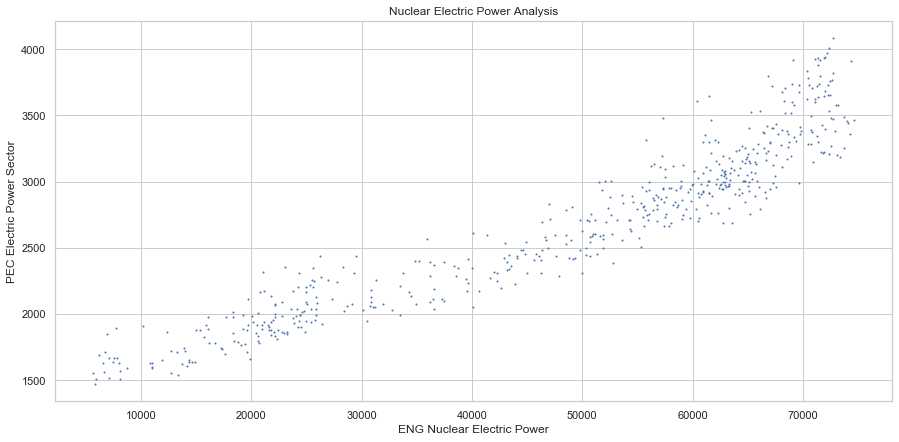

In [11]:
# Create basic scatter plot to view two-variable relationship
plt.figure(figsize=(15, 7))
plt.scatter(merged_df['Value_GENERATE'], merged_df['Value_CONSUME'], s=1)
plt.title('Nuclear Electric Power Analysis');
plt.xlabel(generate_category);
plt.ylabel(consume_category);

### Exercise 1:

Write code to produce additional scatterplots that give insight into the relationship between the energy consumption for the commercial sector and nuclear electric power net energy generation. Is the relationship between these variables stronger or weaker when compared to the electric power sector's result? What might this mean in terms of a potential business recommendation?

**Answer.** One possible solution is shown below:

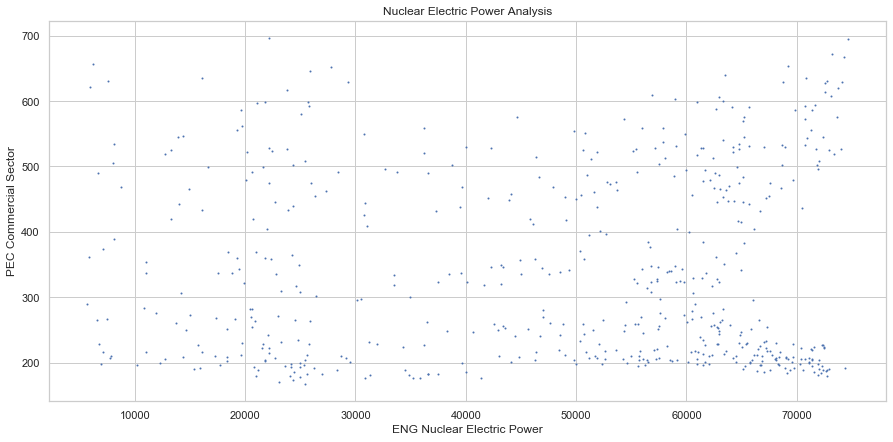

In [12]:
consume_category = 'PEC Commercial Sector'
generate_category = 'ENG Nuclear Electric Power'

# Select electric power sector for energy consumption 
consume_df = clean_energy_df[clean_energy_df['Description'] == consume_category][['YYYYMM','Value']].reset_index(drop=True)

# Select electricity generated by all sectors
generate_df = clean_electricity_df[clean_electricity_df['Description'] == generate_category][['YYYYMM','Value']].reset_index(drop=True)

# Merge into one data frame for ease of plotting
merged_df = pd.merge(consume_df, generate_df, how='left', on=['YYYYMM'], suffixes=('_CONSUME','_GENERATE'))

# Basic scatter plot
plt.figure(figsize=(15, 7))
plt.scatter(merged_df['Value_GENERATE'], merged_df['Value_CONSUME'], s=1)
plt.title('Nuclear Electric Power Analysis');
plt.xlabel(generate_category);
plt.ylabel(consume_category);

From these plots we see that commercial sector consumption levels do not track nuclear electric power generation levels very well, while electric power sector levels do. This may mean that it is critical for your firm to dedicate significant resources towards electricity generation for the electric power sector, as it seems to be a significant driver of marginal demand for nuclear power.

## Trends in energy consumption and generation over time

While a scatterplot helps us visualize the relationship between two variables, it does not allow us to look at something across time. For this, we will a different tool: the **line plot**.

A line plot is excellent for viewing time series data and will help us determine any trends and cyclical patterns across time for both electric power sector energy consumption and nuclear electric power energy generation.

Let's build a line plot for each of these series:

In [13]:
consume_category = 'PEC Electric Power Sector'
generate_category = 'ENG Nuclear Electric Power'

# Select electric power sector for energy consumption 
consume_df = clean_energy_df[clean_energy_df['Description'] == consume_category][['YYYYMM','Value']].reset_index(drop=True)

# Select electricity generated by all sectors
generate_df = clean_electricity_df[clean_electricity_df['Description'] == generate_category][['YYYYMM','Value']].reset_index(drop=True)

# Merge into one data frame for ease of plotting
merged_df = pd.merge(consume_df, generate_df, how='left', on=['YYYYMM'], suffixes=('_CONSUME','_GENERATE'))

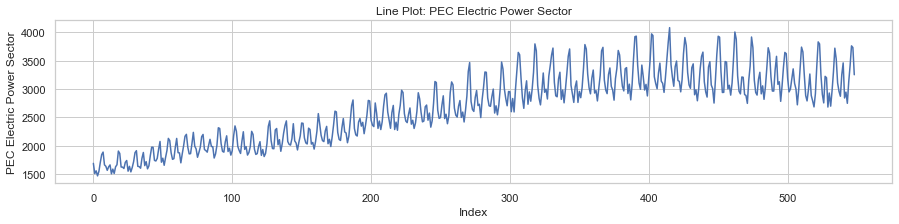

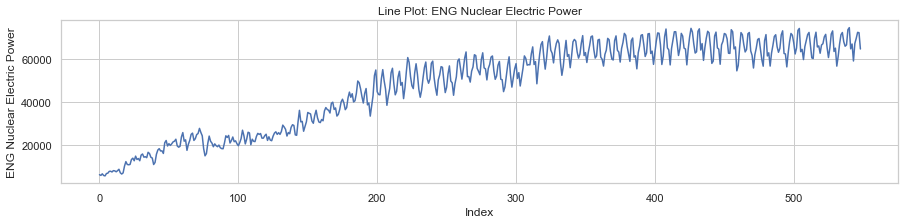

In [14]:
# Line plot for energy consumption over time
plt.figure(figsize=(15,3))
plt.plot(merged_df['Value_CONSUME'])
plt.title('Line Plot: ' + consume_category)
plt.xlabel('Index');
plt.ylabel(consume_category);

# Line plot for electricity generation over time
plt.figure(figsize=(15,3))
plt.plot(merged_df['Value_GENERATE'])
plt.title('Line Plot: ' + generate_category)
plt.xlabel('Index');
plt.ylabel(generate_category);

Notice that we see that both energy consumption and generation are increasing over time, with a strong cyclical trend (observe the oscillating nature of the time series). However, the way in which we've plotted these line plots does not nicely format the x-axis. We'd like the x-axis to be dates rather than simply the DataFrame index value.

### Enhancing time series visualization by including formatted dates in the line plot

Luckily, Python allows us to nicely format dates for display in the plot. This is useful when including work in a report that will be presented to an audience, as it is more professional and easier to understand for non-technical people.

In [15]:
# Convert YYYYMM string to datetime format
merged_df['YYYYMM_dt'] = merged_df['YYYYMM'].apply(lambda x: datetime.datetime.strptime(str(x), "%Y%m"))
merged_df.head()

,YYYYMM,Value_CONSUME,Value_GENERATE,YYYYMM_dt
0,197301,1691.096,6246.251,1973-01-01
1,197302,1511.458,5928.069,1973-02-01
2,197303,1559.159,6649.007,1973-03-01
3,197304,1470.152,5876.392,1973-04-01
4,197305,1551.631,5696.657,1973-05-01


//anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


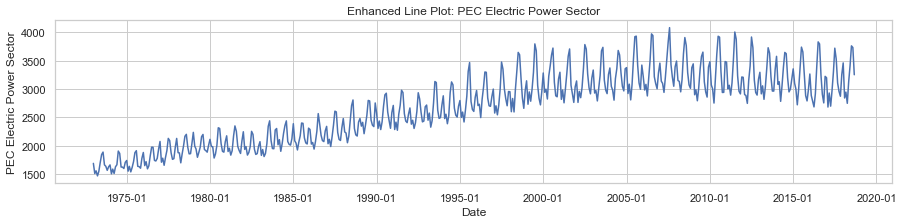

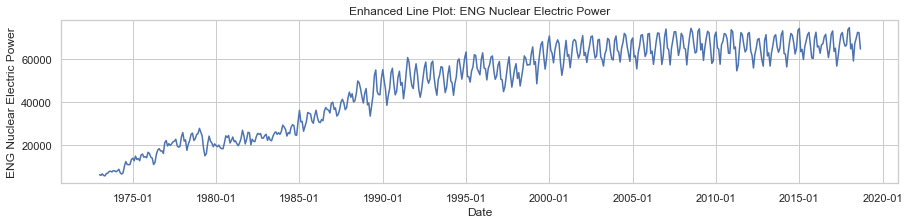

In [16]:
# Enhanced line plot for energy consumption over time
fig, ax = plt.subplots(figsize=(15,3))
ax.plot(merged_df['YYYYMM_dt'], merged_df['Value_CONSUME'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # format x-axis display
plt.title('Enhanced Line Plot: ' + consume_category)
plt.xlabel('Date');
plt.ylabel(consume_category);

# Enhanced line plot for electricity generation over time
fig, ax = plt.subplots(figsize=(15,3))
ax.plot(merged_df['YYYYMM_dt'], merged_df['Value_GENERATE'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # format x-axis display
plt.title('Enhanced Line Plot: ' + generate_category)
plt.xlabel('Date');
plt.ylabel(generate_category);

### Exercise 2:

Write code to determine if the oscillations in variable ```PEC Electric Power Sector``` are getting larger over time (hint: use ```merged_df['Value_CONSUME'].pct_change()```). Plot the percentage change for each month across time, using the formated dates on the x-axis.

**Answer.** One possible solution is shown below:

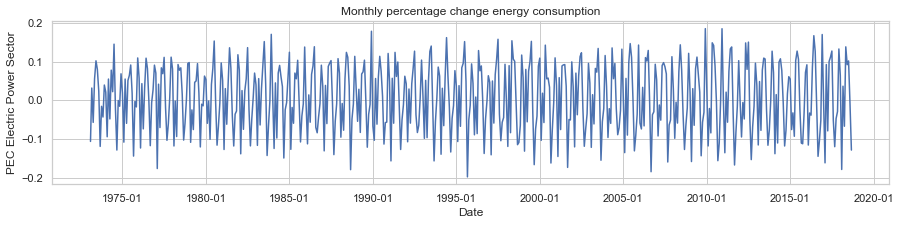

In [17]:
fig, ax = plt.subplots(figsize=(15,3))
ax.plot(merged_df['YYYYMM_dt'], merged_df['Value_CONSUME'].pct_change())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # format x-axis display
plt.title('Monthly percentage change energy consumption')
plt.xlabel('Date');
plt.ylabel(consume_category);

We see that the percentage changes from month to month are not growing significantly over time. This indicates that the percentage fluctuations in energy consumption remain relatively constant, even as the total amount of energy used across time has grown.

In light of this, one useful statistic to better understand energy usage relative to electricity generation is the ratio of energy consumed to electricity generated. This may give us insight into how well supply meets demand and how our nuclear power plant business may expand and contract electricity generation in high or low demand periods.

## Analyzing the ratio of energy consumed to electricity generated

Let's calculate the ratio of energy consumed over energy generated. Using ```pandas```'s ```describe()``` method, let's take a look at the distribution of this ratio. Understanding the distribution of the ratio will allow use to see how energy consumption and electricity generation deviate relative to one another. We will continue to look at the ```PEC Electric Power Sector``` energy consumption and ```ENG Nuclear Electric Power``` energy generation for this:

In [18]:
# Add an additional 'Ratio' feature: energy consumed / energy generated
merged_df['Ratio'] = merged_df['Value_CONSUME'] / merged_df['Value_GENERATE']
merged_df['MM'] = merged_df['YYYYMM'].apply(lambda x: int(str(x)[-2:])) # add month for grouping in boxplot
merged_df['Ratio'].describe()

count    549.000000
mean       0.067657
std        0.037364
min        0.042228
25%        0.048509
50%        0.052726
75%        0.076986
max        0.272376
Name: Ratio, dtype: float64

It's also useful to obtain graphical representation of the distribution of data by constructing a histogram. A histogram can be displayed using the ```plt.hist()``` method in Python. This histogram method takes the ```bin``` input which indicates how granularly you'd like to view the data. In this case, we will use 50 bins:

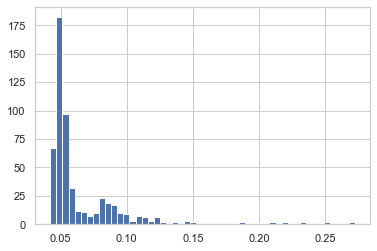

In [19]:
plt.hist(merged_df['Ratio'], bins=50);

Here we see that the ```Ratio``` variable is largely clustered around 0.05, with some large values that extend upward to 0.25, though these higher values are not common (hence they have a bar with a smaller height in the histogram). 

Is there something that combines a visual for the distribution of the data with summary statistics? There is! The **boxplot**. Boxplots are a quick and easy graphical method to observe whether significant extreme values are present in the data and can offer insight into whether the data has a large variance or is skewed. Boxplots consist of an inner box, and two whiskers on either side. The central horizontal line in the middle of the box correponds to the median of the data that the boxplot represents, while the upper and lower edges of the box represent the 75th percentile and 25th percentile of the data, respectively. The whiskers are drawn 1.5 * IQR distance from the edges of the box, where IQR is the interquartile range of the data, namely the 75th percentile value minus the 25th percentile value. Thus, boxplots give a great visual summary of the distribution of the data.

Since we saw a cyclical pattern in the line plot analysis preceding this section, let's take a closer look at how the distribution of the ratio of consumed to generated energy evolves over the different months of the year.

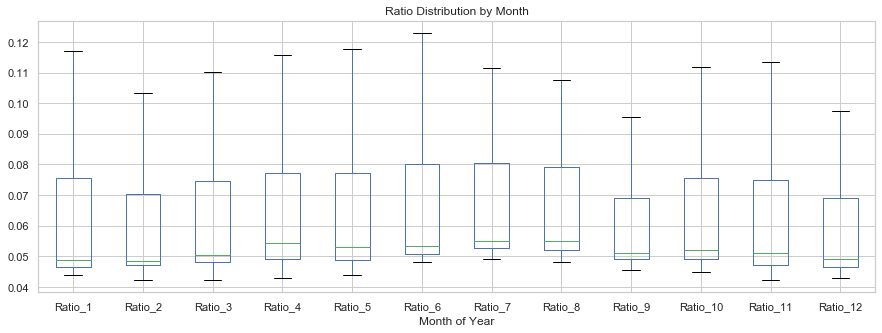

In [20]:
# Select months to use
unique_months = [1,2,3,4,5,6,7,8,9,10,11,12]

# Loop through all months and store each DataFrame in list
df_list = []
for month_int in unique_months:
    temp_df = merged_df[merged_df['MM'] == month_int][['Ratio']].reset_index(drop=True) # Select month
    temp_df = temp_df.rename(columns={'Ratio':'Ratio_'+str(month_int)}) # rename for ease of plotting
    df_list.append(temp_df) # store for later concatenation

# Aggregate data
plot_df = pd.concat(df_list, axis=1)

# Box plots
fig, ax = plt.subplots(figsize=(15,5))
plot_df.boxplot(ax=ax, showfliers=False)
ax.set_xlabel('Month of Year');
ax.set_title('Ratio Distribution by Month');

Here, we see a pattern of higher ratios in the summer months, particularly July (month 7) and August (month 8). The boxes in the box plot shift upward in summer months, and subsequently shift downward in winter months.

### Exercise 3:

Recall the ratio is the energy consumed (PEC Electric Power Sector) divided by the energy generated (ENG Nuclear Electric Power). We see that the ratio of consumed over generated energy has a slight upward trend in mid-year. What could be a possible reason for this pattern? What might you recommend to your boss based on this?

**Answer.** The summer months lead to increased energy consumption directed towards cooling capacity due to high temperatures across the U.S. The amount of power being generated does not increase as much as the energy being consumed does, so there is an upward trend in the ratio of consumed to generated energy. From this, it may be possible for your firm to step in and provide marginal quantities of energy to meet demand (however, there is more research you need to do to validate this opportunity).

Now that we've seen some of Python's basic data visualization tools, let's begin to explore these cyclical peaks in the summer months using a second, highly useful package: ```seaborn```.

## Using ```seaborn``` for advanced visualization of the identified cyclical patterns

```seaborn``` is an extremely useful data visualization library for simple and complex figures. We will go through some important plotting functionality while continuing to identify trends in the energy data.

To further explore the cyclical patterns identified in the summer months, let's label the rows in the ```merged_df``` that represent summer months (call them peak months) and use seaborn's ```pairplot()``` function to visualize the distributional differences in energy consumed and electricity generated between the peak and non-peak months:

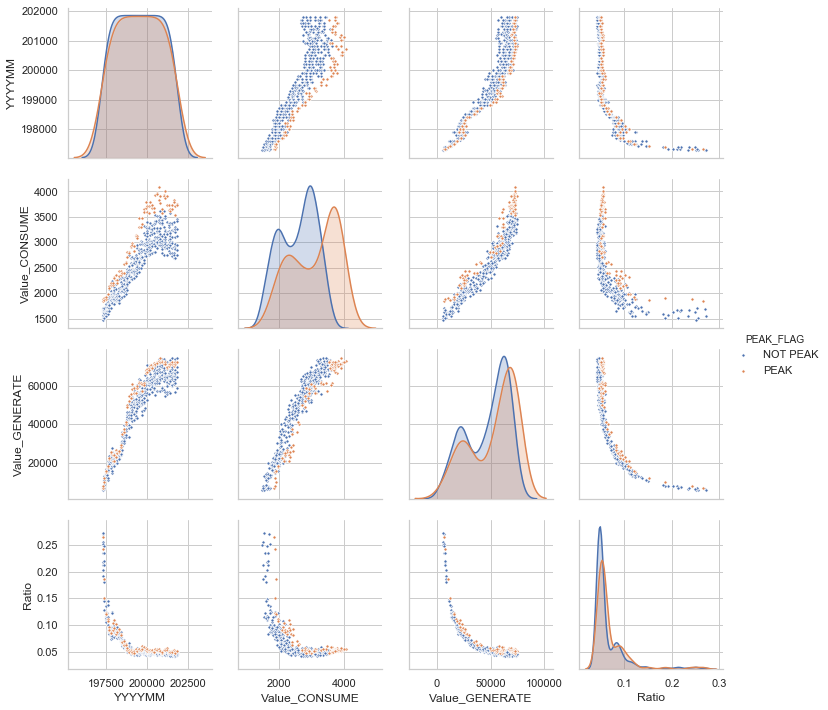

In [21]:
# Add a flag for summer months
customized_df = merged_df.copy()
customized_df['PEAK_FLAG'] = customized_df['YYYYMM'].apply(lambda x: 'PEAK' if str(x)[-2:] in ['07','08'] else 'NOT PEAK')

sns.pairplot(customized_df, hue='PEAK_FLAG', x_vars=['YYYYMM','Value_CONSUME','Value_GENERATE','Ratio'], y_vars=['YYYYMM','Value_CONSUME','Value_GENERATE','Ratio'], plot_kws={'s':10});

Here, we see that pair plot takes each numeric column in the DataFrame and creates a scatter plot against the other numeric columns. The resulting plots are then aligned in a grid for easy viewing. The plots along the main diagonal are plots of the distributions of the individual columns present in the DataFrame. Furthermore, note that all data points are colored according to their peak/non-peak status. Hence, ```pairplot()``` gives an incredible amount of information about our data.

We observe that the peak months do have different distributions of energy consumed and energy generated compared to the non-peak months. But thus far, we've only looked at months at an aggregate level to see if some months have higher energy consumption and generation than others. Our boss wants us to investigate how these patterns have changed over time, and part of that assignment requires that we look at these patterns across years.

## Are peak consumption and generation months consistent across many years?

Let's now break down the analysis to a month-by-month level over time to see if the peak cyclical patterns we see are stable across many decades of data.

```seaborn``` offers a powerful **heatmap** method ```heatmap()``` that will allow us to nicely visualize the monthly energy consumed and electricity generated over time:

In [22]:
# Extract year to be used in heatmap
customized_df['YYYY'] = customized_df['YYYYMM'].apply(lambda x: str(x)[:-2])

# Create pivot table (formats data to make it easy to visualize data across months and years)
pivot_elec_df = customized_df.pivot('MM','YYYY','Value_GENERATE')
pivot_ener_df = customized_df.pivot('MM','YYYY','Value_CONSUME')

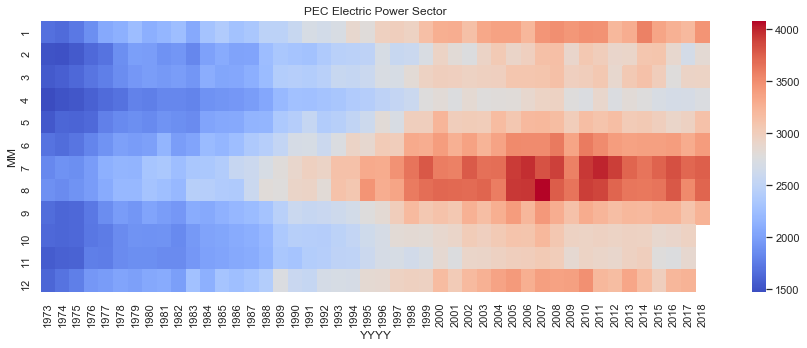

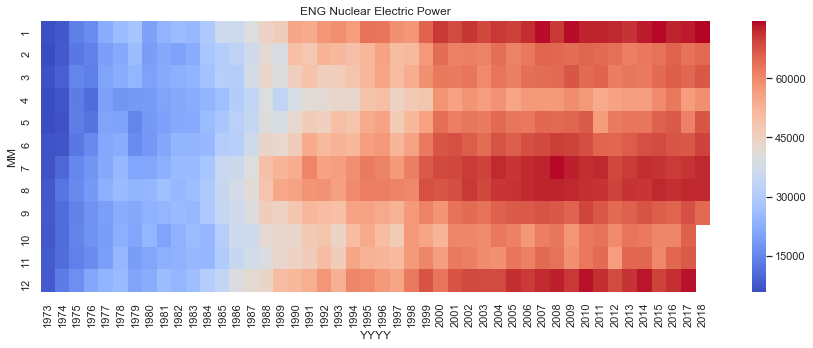

In [23]:
# Heat map of energy consumption by month and year
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(pivot_ener_df, cmap="coolwarm", ax=ax);
ax.set_title('PEC Electric Power Sector');

# Heat map of electricity generation by month and year
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(pivot_elec_df, cmap="coolwarm", ax=ax);
ax.set_title('ENG Nuclear Electric Power');

The color bar on the right indicates the level of the variable under study. Using the heatmap, it is easy to see that there is a notable increase in both energy consumption and generation in the peak summer months that began in the 1990s. However, in the earlier years (before 1990) the difference between the peak summer months and other months is not as marked (although it still exists). This may be due to the increase in usage of cooling units in the past few decades.

Additionally, we see the overall energy consumed and electricity generated over time is increasing. This is indicated by the colors moving from blue to red in both heat maps as the years go by. This is expected, as aggregate demand has increased due to numerous outside factors, such as population growth and increased technology usage, both of which lead to increased energy demand and electricity supply. 

Evidently, these heatmaps are enormously useful for identifying big, sweeping trends over time. However one downside of these heatmaps is that it is tough to be more granular and see changes in growth rates from year to year. Let's build a boxplot to better understand if growth is stable across time, and whether this translates to growth in both the peak and non-peak months.

### Exercise 4:

Given that we have looked at how the ratio of energy consumed to electricity generated moved over time, let's create a graphical view to determine how stable the relationship between these two quantites has been over the past few decades. Write a script to generate a heat map that shows the ratio of ```Electric Power Sector ``` energy consumption and ```ENG Nuclear Electric Power``` for each YYYY and MM. Use ```customized_df``` for the analysis.

**Answer.** One possible solution is shown below:

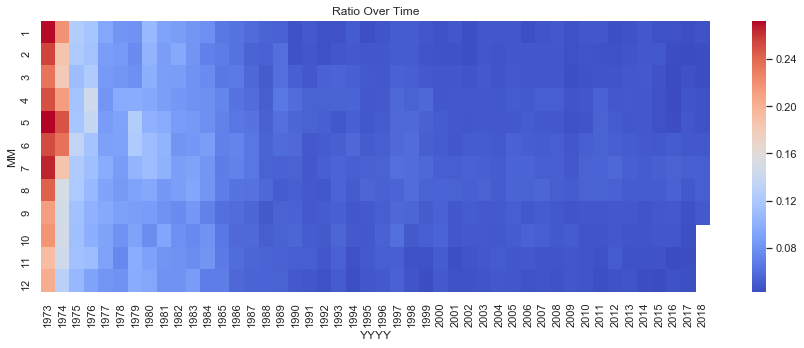

In [24]:
pivot_radio_df = customized_df.pivot('MM','YYYY','Ratio')

# Heat map of the ratio by month and year
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(pivot_radio_df, cmap="coolwarm", ax=ax);
ax.set_title('Ratio Over Time');

Here we notice that the ratio of consumed energy to electricity generated has been relatively stable over time. There was a large deviation in the ratio of the two quantities in the early 1970s and a little bit into the early 1980s, but since then the values have generally been stable throughout the year.

## Assessing growth stability  differences in peak month energy demands across time
One way to better understand growth stability of energy consumption and electricity generation is to view distributional data over time. In this case, we will combine boxplots for each year, splitting for peak and non-peak months, and determine how stable the growth, consumption, and generation categories have been.

We will again use seaborn's ```boxplot()``` functionality, but this time we will add a flag to draw two boxplots  for each year based on ```PEAK_FLAG```. The boxplots for peak and non-peak months will be different colors.

### Exercise 5:

Focusing on ```customized_df```, write a script to generate the plot below.

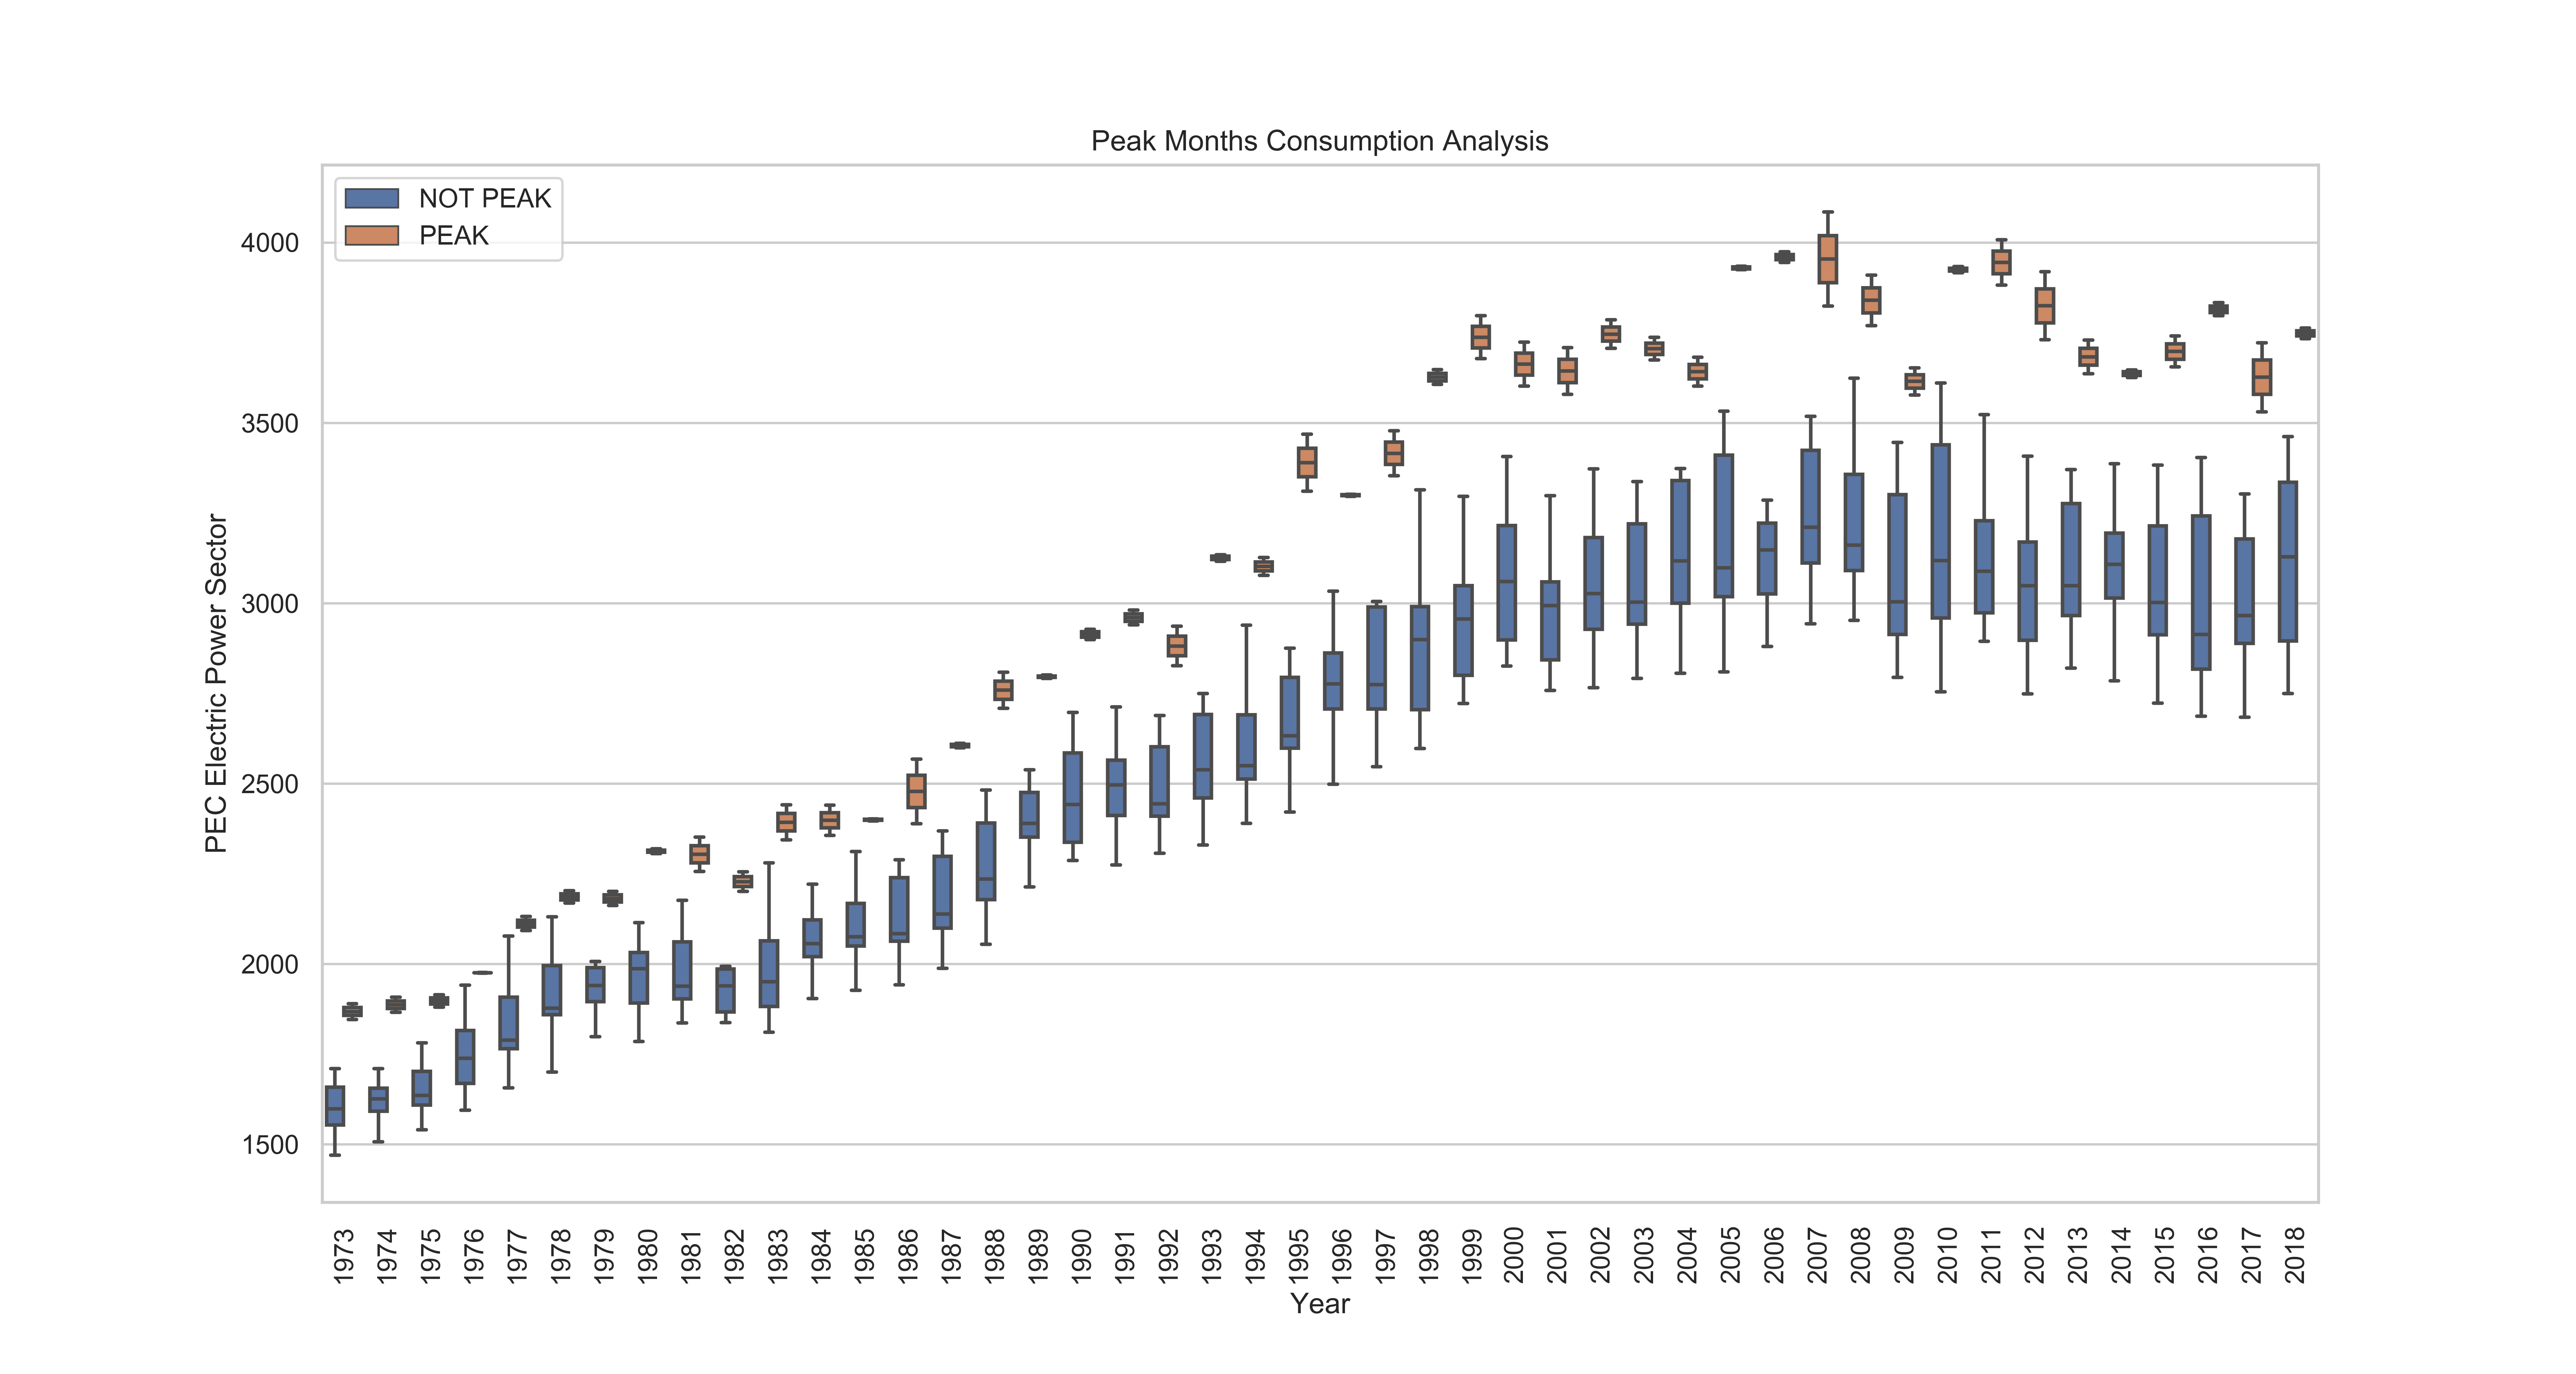

In [25]:
Image("ExampleImage.png")

**Answer.** One possible solution is shown below:

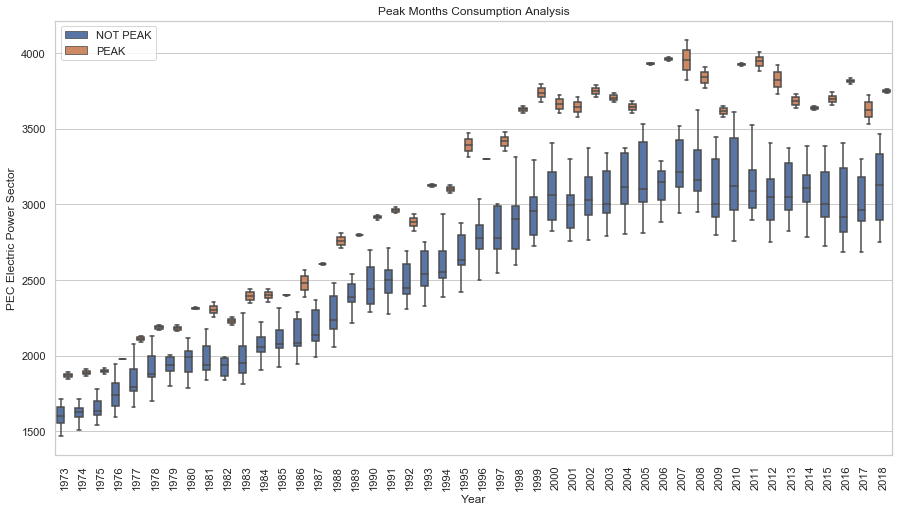

In [26]:
# Define figure size, create plot
fig, ax = plt.subplots(figsize=(15,8))
m = sns.boxplot(x="YYYY",y="Value_CONSUME",hue='PEAK_FLAG',data=customized_df,orient='vertical',showfliers=False)

# Format plot
plt.legend(loc='upper left')
plt.title('Peak Months Consumption Analysis')
plt.xticks(rotation=90);
plt.xlabel('Year')
plt.ylabel('PEC Electric Power Sector');

Here we see that growth in both peak and non-peak months has been relatively stable but in recent years has plateaued. Also notice that the difference between peak and non-peak months has widened over time. This increased fluctuation between peak and non-peak months could present an opportunity for your firm, and is worth further investigation.

We've looked closely at the changes in nuclear electric power generation and consumption over time. Let's now shift towards the second part of your boss's request by looking at consumption patterns across sectors. This has important implications for how the C-suite should allocate resources for the nuclear power generation business.

## Which sectors consume the most energy?

```seaborn``` provides a variety of plots that will be useful in this analysis. We will take a look at ```boxplot()``` and  ```stripplot()```. 

```seaborn``` easily splits the data into categories and creates a boxplot of values for each category:

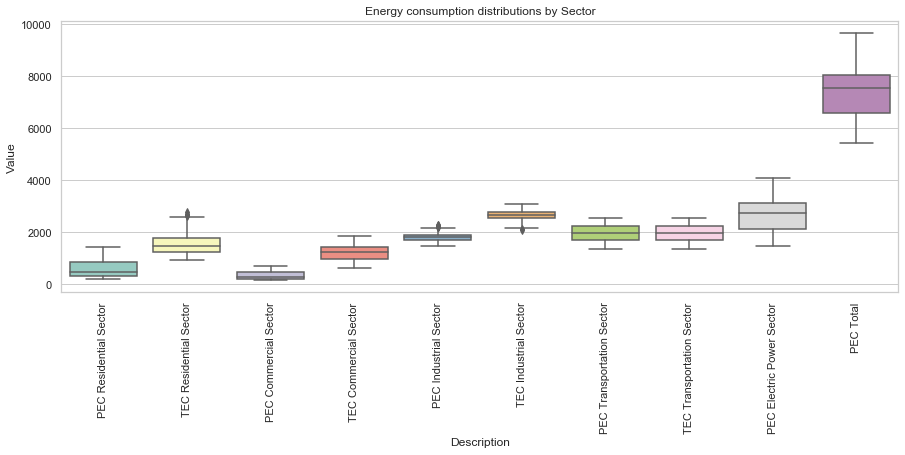

In [27]:
# Boxplot of different sectors' energy consumption values
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x="Description", y="Value", data=clean_energy_df, palette="Set3", ax=ax)
plt.xticks(rotation=90);
plt.title('Energy consumption distributions by Sector');

Here we see that the PEC Electric Power Sector has the highest energy consumption across all sectors. We also see there are sizable differences in the variability of energy consumption across sectors (some box plots have much larger interquartile ranges than others).

However, although boxplots give you some insight into the distribution of the underlying data in each category, they are still relatively blunt instruments. For example, how is the data distributed within the interquartile range? Between the edges of the box and the whiskers? Since a boxplot is created from only five values, it cannot answer these fine-grained questions. However, the **strip plot** is able to combine a 1D scatterplot with a split by category to get an even more granular view of the data.

## A more granular view of energy consumption by sector

```stripplot()``` in ```seaborn``` creates a series of 1D scatterplots (one for each data category) all sharing the same y-axis:

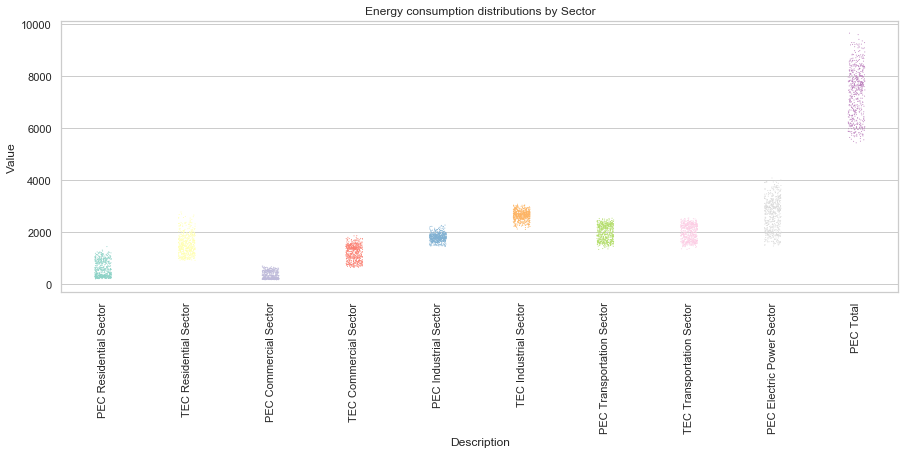

In [28]:
# Create a stripplot() of the data for a nice granular view
fig, ax = plt.subplots(figsize=(15,5))
m = sns.stripplot(x="Description", y="Value", data=clean_energy_df, palette="Set3", s=1, ax=ax)
plt.xticks(rotation=90);
plt.title('Energy consumption distributions by Sector');

### Exercise 6:

From the above graphs, which of the sectors has the widest range of PEC values? Which of the sectors has the smallest range of PEC values? How could this information be useful to energy production companies?

**Answer.** The widest range of values appears to be the electric power sector, while the smallest range of values comes from the commercial sector. The information on the spread of energy usage can be very important to companies to ensure they have adequate infrastructure in place to meet the varying demand of energy consumption. If there is a wide range of energy consumption over time, the energy producing firm must have a scalable infrastructure, while maintaining the ability to expand capacity when needed to meet excess energy demand.

Now, on to our final task – how do we generate files for these plots so that they can be used in your boss's presentation to the C-suite?

# Programmatic plot generation

Let's take a look at how to create plots of values for each energy consumption sector, in addition to how to programatically add a folder where we will save the plots as PNG files:

In [29]:
# Construct DataFrame that will be used for plotting
plot_df = clean_energy_df.copy()
plot_df['YYYYMM_dt'] = plot_df['YYYYMM'].apply(lambda x: datetime.datetime.strptime(str(x), "%Y%m"))
plot_df.head()

,YYYYMM,Value,Description,Unit,MM,YYYY,YYYYMM_dt
0,197301,1313.816,PEC Residential Sector,Trillion Btu,1,1973,1973-01-01
1,197302,1150.011,PEC Residential Sector,Trillion Btu,2,1973,1973-02-01
2,197303,970.362,PEC Residential Sector,Trillion Btu,3,1973,1973-03-01
3,197304,709.631,PEC Residential Sector,Trillion Btu,4,1973,1973-04-01
4,197305,544.596,PEC Residential Sector,Trillion Btu,5,1973,1973-05-01


Now let's make a folder called ```PlotDir``` where will we save the plots in PNG files:

In [30]:
# Make new folder to save plots
plot_dir = os.path.join(os.getcwd(), 'PlotDir')

# Only make new folder if it doesn't already exist
if not(os.path.isdir(plot_dir)):
    os.mkdir(plot_dir) # creates new folder

Finally, loop over all the energy consumption sectors, create line plots, and save the figures:

In [31]:
# One can quickly generate and save plots with ease in Juypter
unique_desc = sorted(plot_df['Description'].unique())
for i in unique_desc:
    fig, ax = plt.subplots(figsize=(15,4))
    temp_df = plot_df[plot_df['Description'] == i]
    ax.plot(temp_df['YYYYMM_dt'], temp_df['Value'])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y%m')) # format x-axis display

    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Data Description: ' + str(i))
    plt.tight_layout()
    
    # Save to png
    file_name = 'SectorPlot ' + str(i) + '.png'
    print("Saving: " + file_name)
    fig.savefig(os.path.join(plot_dir,file_name)) # save to png (save in plot_dir)
    plt.close(fig) # Do not print plots to notebook (large number of plots can take up significant memory)

Saving: SectorPlot PEC Commercial Sector.png
Saving: SectorPlot PEC Electric Power Sector.png
Saving: SectorPlot PEC Industrial Sector.png
Saving: SectorPlot PEC Residential Sector.png
Saving: SectorPlot PEC Total.png
Saving: SectorPlot PEC Transportation Sector.png
Saving: SectorPlot TEC Commercial Sector.png
Saving: SectorPlot TEC Industrial Sector.png
Saving: SectorPlot TEC Residential Sector.png
Saving: SectorPlot TEC Transportation Sector.png


We've saved the results in the ```PlotDir``` folder. Each plot has been created with the same general code structure, ensuring the resulting plots are the same format, even though each one contains a different sector's data. This programmatic method of generating plots is highly useful when creating systematic data visualization procedures in both simple and complex data investigations.

### Exercise 7:

Write a script to generate a plot of boxplots of ```Value``` for each year in ```clean_energy_df```, where the boxplots are created from the values of each sector category from ```Description``` . For example, the boxplot for year 2000 is below. Save the plots in PNG files in a new folder ```YearlyBoxplotDir``` (create this), and name the figures in the format ```YearlyBoxplot_[yearnum].png```, where you replace ```[yearnum]``` with the correct year. For example, the year 2000 boxplot is saved as ```YearlyBoxplot_2000.png```. You must produce one boxplot figure for each year from 1973 to 2018; hence, you will have one PNG image file per year.

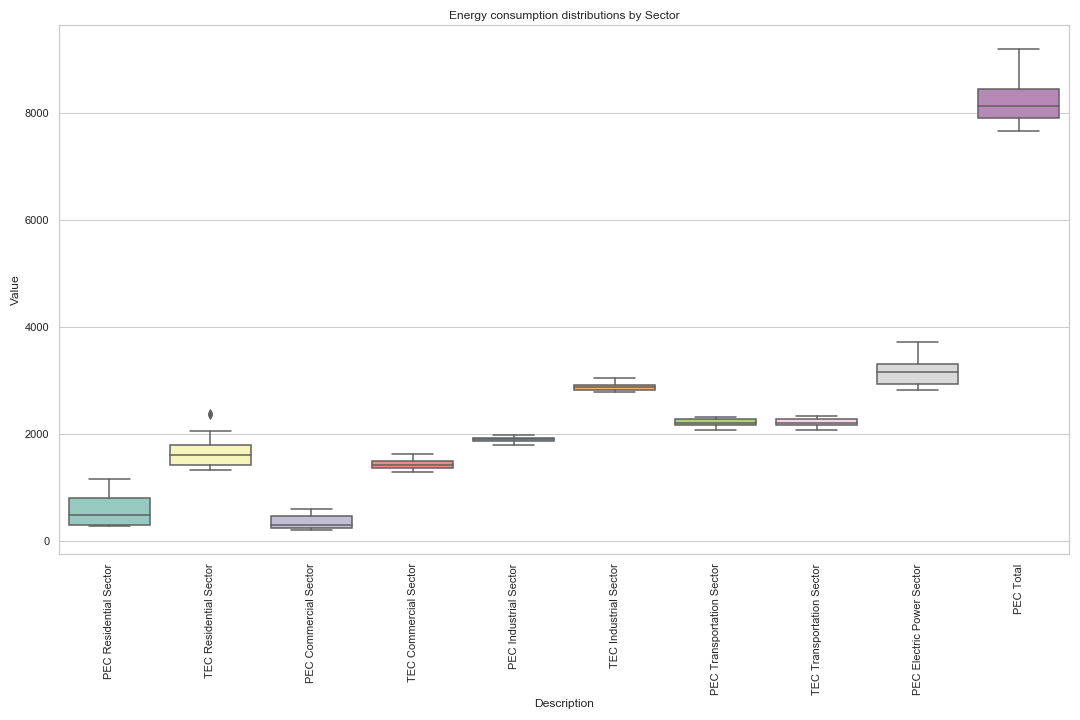

In [32]:
# Example of one of the years boxplot figures
Image("YearlyBoxplot_2000.png")

**Answer.** One possible solution is shown below:

In [33]:
# Make new folder to save plots
boxplot_dir = os.path.join(os.getcwd(), 'YearlyBoxplotDir')

# Only make new folder if it doesn't already exist
if not(os.path.isdir(boxplot_dir)):
    os.mkdir(boxplot_dir) # creates new folder

# Get unique years to loop over
unique_years = sorted(clean_energy_df['YYYY'].unique())

for i in unique_years:
    # Boxplot of different sectors' energy consumption values
    fig, ax = plt.subplots(figsize=(15,10))
    sns.boxplot(x="Description", y="Value", data=clean_energy_df[clean_energy_df['YYYY'] == i], palette="Set3", ax=ax)
    plt.xticks(rotation=90);
    plt.title('Energy consumption distributions by Sector')
    plt.tight_layout()
    
    # Save to png
    file_name = 'YearlyBoxplot_' + str(i) + '.png'
    print("Saving: " + file_name)
    fig.savefig(os.path.join(boxplot_dir,file_name)) # save to png (save in plot_dir)
    plt.close(fig) # Do not print plots to notebook (large number of plots can take up significant memory)

Saving: YearlyBoxplot_1973.png
Saving: YearlyBoxplot_1974.png
Saving: YearlyBoxplot_1975.png
Saving: YearlyBoxplot_1976.png
Saving: YearlyBoxplot_1977.png
Saving: YearlyBoxplot_1978.png
Saving: YearlyBoxplot_1979.png
Saving: YearlyBoxplot_1980.png
Saving: YearlyBoxplot_1981.png
Saving: YearlyBoxplot_1982.png
Saving: YearlyBoxplot_1983.png
Saving: YearlyBoxplot_1984.png
Saving: YearlyBoxplot_1985.png
Saving: YearlyBoxplot_1986.png
Saving: YearlyBoxplot_1987.png
Saving: YearlyBoxplot_1988.png
Saving: YearlyBoxplot_1989.png
Saving: YearlyBoxplot_1990.png
Saving: YearlyBoxplot_1991.png
Saving: YearlyBoxplot_1992.png
Saving: YearlyBoxplot_1993.png
Saving: YearlyBoxplot_1994.png
Saving: YearlyBoxplot_1995.png
Saving: YearlyBoxplot_1996.png
Saving: YearlyBoxplot_1997.png
Saving: YearlyBoxplot_1998.png
Saving: YearlyBoxplot_1999.png
Saving: YearlyBoxplot_2000.png
Saving: YearlyBoxplot_2001.png
Saving: YearlyBoxplot_2002.png
Saving: YearlyBoxplot_2003.png
Saving: YearlyBoxplot_2004.png
Saving: 

## Conclusions

We've done an extensive analysis of energy consumption and electricity generation trends over time and across sectors.

We discovered that there is a peak in energy consumption and generation in the summer months of the year, and as time has passed the gap between peak and non-peak consumption has widened. This may present a market opportunity for a power plant which has the ability to expand and contract capacity as needed.

Finally, we saw that different sectors have very different energy consumption profiles. In particular, the electric power sector seems to be a significant driver of marginal demand. This means that even for table stakes, your firm ought to dedicate significant resources towards that sector.

## Takeaways

In this case we've covered a variety of data visualization techniques in Python. We covered basic plotting to observe relationships and trends across time, and introduced the ubiquitous ```seaborn``` library which offers advanced plotting functionality. We also learned how to programmatically generate plots which can be very useful to communicate with non-technical stakeholders when advocating for large organizational changes.